Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


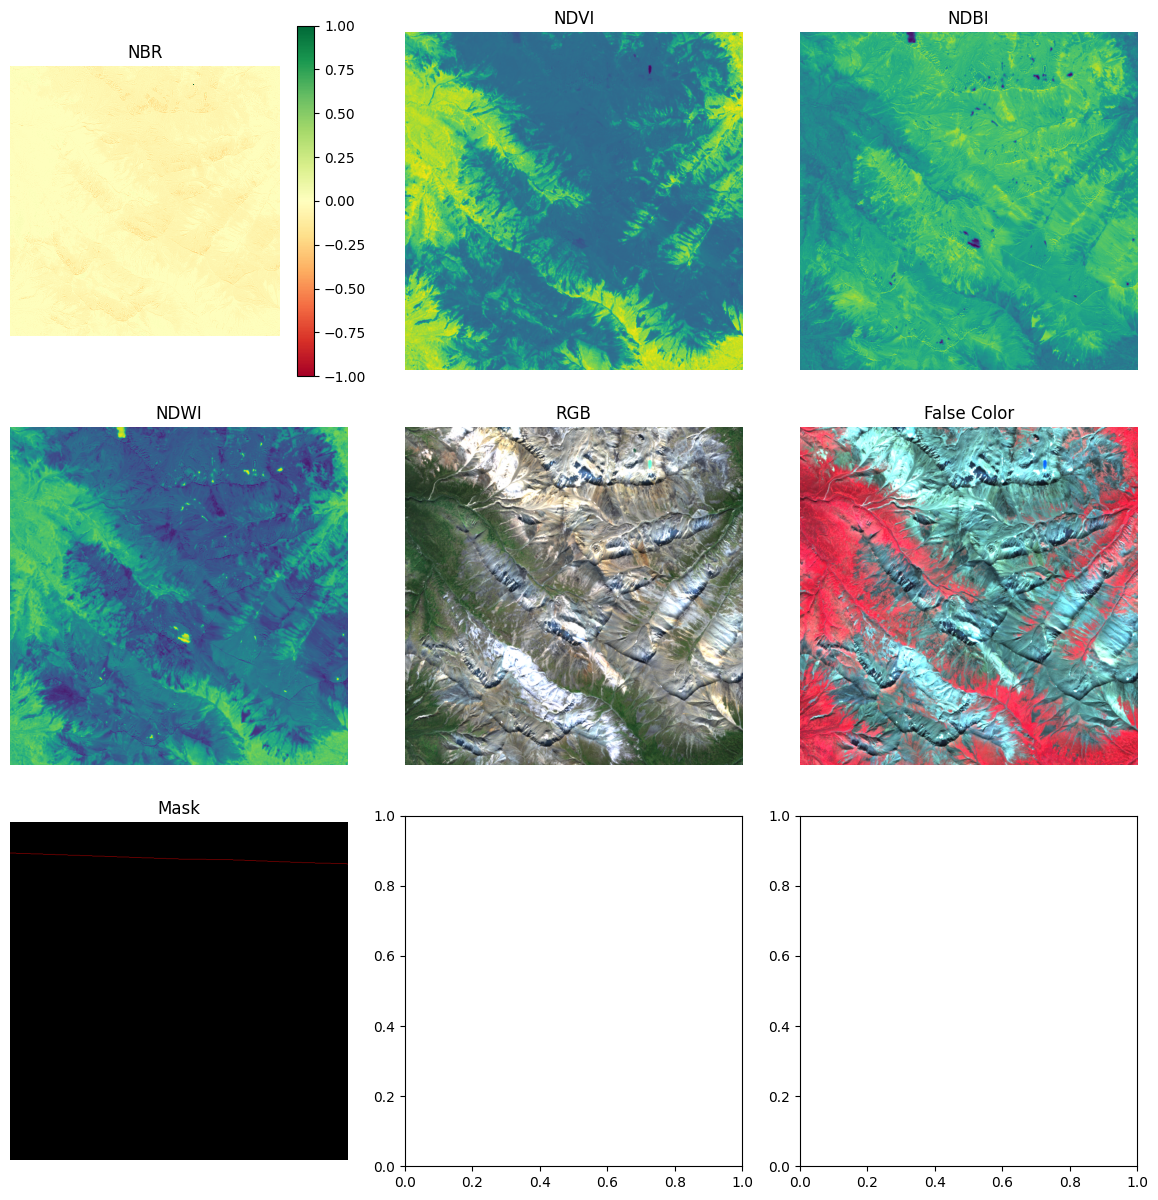

In [3]:
import dataset  # Assuming the provided code is saved in a file named 'dataset.py'
from pathlib import Path

# Define the path to your data and the split you want to use (e.g., 'train')
data_path = Path("/Users/annabelle/Documents/NEU/CS7980/Capstone/prepare_dataset")
split = "train"  # or 'val' or 'test', depending on your dataset_splits.csv

# Instantiate the dataset
mine_sat_dataset = dataset.MineSATDataset(split=split, data_path=data_path)

# Choose an index of an image you want to visualize
index = 1  # You can change this to any valid index

# Display the transformed images including NBR and NDVI
mine_sat_dataset.display_transformed_images(index)
